## DATASET AND MOTIVATION

The dataset has been download from [kaggle](https://www.kaggle.com/blastchar/telco-customer-churn).

Though the primary motivation for the dataset was to explore customer retention programs, we can also look at forming clusters to see the different types of customers and then offer packages catering to each.

The data set includes information about:
<ul>
<li> Customers who left within the last month – the column is called Churn <br/>
<li> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies <br/>
<li> Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges <br/>
<li> Demographic info about customers – gender, age range, and if they have partners and dependents
</ul>

### Data Import and Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('cust_data.csv')
print(data.nunique())
pd.set_option('display.max_rows', 50)
data.head()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In the data visualization phase, I noticed the text, "no internet service" multiple times, hence I decided to replace this with no since this carried more or less the same information.

In [2]:
data = data.replace({'No internet service': 'No'})
data = data.replace({'No phone service': 'No'})

## Data Visualization

Let's take a look at which variables seem to be linked to higher churn rates.

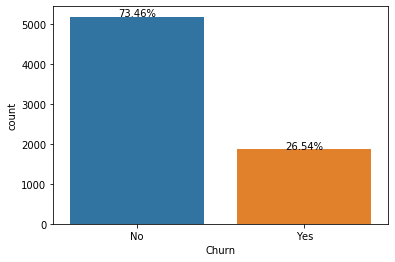

In [3]:
def add_perclabels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center") 

total = float(len(data))
ax = sns.countplot(x='Churn',data=data) # for Seaborn version 0.7 and more
add_perclabels(ax)

We can see that around 27% of our data contains customers who churned. Now lets look at how these percentages show when we look at them according to the categorical variables in our dataset. We'll first look at how it varies according to customer personal attributes and then according to the services they avail.

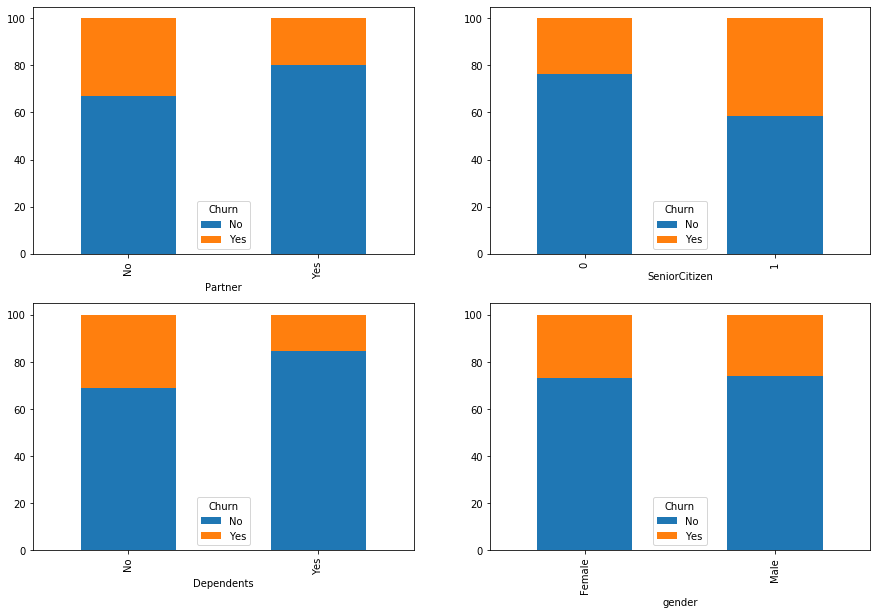

In [4]:
def plotcat(catname,axes):
    data_bar = pd.crosstab(data[catname],data['Churn'],normalize='index')*100
    g = data_bar.plot(kind='bar', stacked=True,ax=axes)
    
f, axes = plt.subplots(2, 2,figsize=(15,10))
plotcat('Partner',axes[0][0])
plotcat('SeniorCitizen',axes[0][1])
plotcat('Dependents',axes[1][0])
plotcat('gender',axes[1][1])

Looking at the graphs above, the following conclusion can be drawn
<ul><li> Churn rates seem to be the same for males and females so gender does not seem to have an impact.
    <li>Churn rates are higher for senior citizens.
        <li> Churn rates also seem to be higher for people with no partners. This might be because partners tend to stick to the same network whereas people without partners change networks more easily. This seems to be true for people with dependents as well.

Text(0.5, 0, 'Tenure')

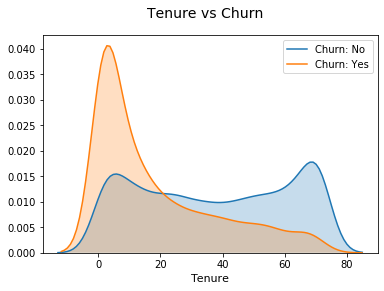

In [11]:
fig = sns.kdeplot(data[data['Churn'] == 'No']['tenure'].dropna(),label= 'Churn: No',shade=True)
fig = sns.kdeplot(data[data['Churn'] != 'No']['tenure'].dropna(),label= 'Churn: Yes',shade=True)
fig.figure.suptitle("Tenure vs Churn", fontsize = 14)
plt.xlabel('Tenure', fontsize=11)

Customers who've been with the network longer are less likely to churn. We can see that a high percentage of the people who churn are those who just joined the network, i.e their tenure value is low.

Text(0.5, 0, 'Monthly Charges')

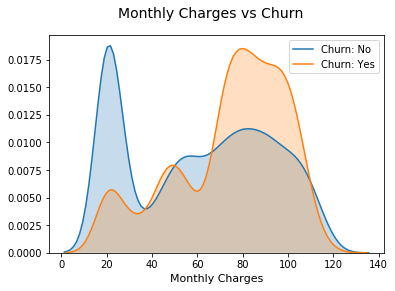

In [12]:
fig = sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'].dropna(),label= 'Churn: No',shade=True)
fig = sns.kdeplot(data[data['Churn'] != 'No']['MonthlyCharges'].dropna(),label= 'Churn: Yes',shade=True)
fig.figure.suptitle("Monthly Charges vs Churn", fontsize = 14)
plt.xlabel('Monthly Charges', fontsize=11)

There is a high probability that people with high monthly charges are going to churn. We can see that this is also true for very small values of monthly charges. This might be because those who churned had low monthly charges due to the fact that they left the network or becuase they might be using the network as a secondary/backup option ( hence lower monthly charges due to infrequent use and churn if they don't need it anymore.)

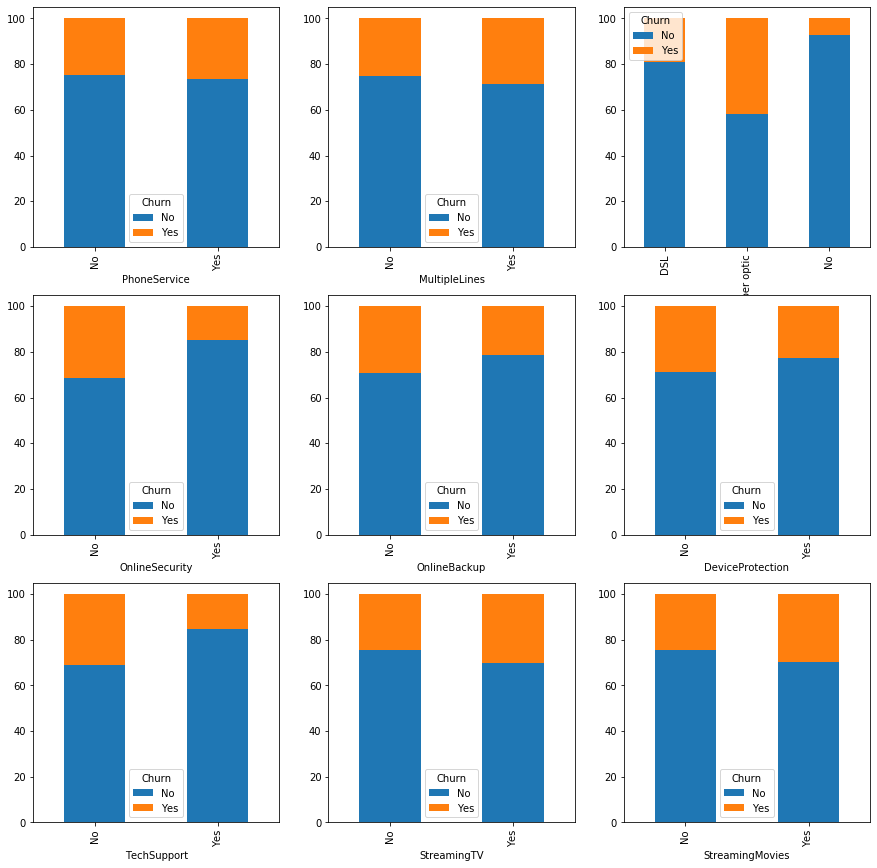

In [13]:
f, axes = plt.subplots(3, 3,figsize=(15,15))
plotcat('PhoneService',axes[0][0])
plotcat('MultipleLines',axes[0][1])
plotcat('InternetService',axes[0][2])
plotcat('OnlineSecurity',axes[1][0])
plotcat('OnlineBackup',axes[1][1])
plotcat('DeviceProtection',axes[1][2])
plotcat('TechSupport',axes[2][0])
plotcat('StreamingTV',axes[2][1])
plotcat('StreamingMovies',axes[2][2])

Looking at these graphs, we can draw the following insights:
<ul><li> Churn seems to be higher for people availing fiber optic services,online security, and tech support.
    <li>The same relationship is true (but to a lower extent) for streaming tv, streaming movies, online bckup and device protection.

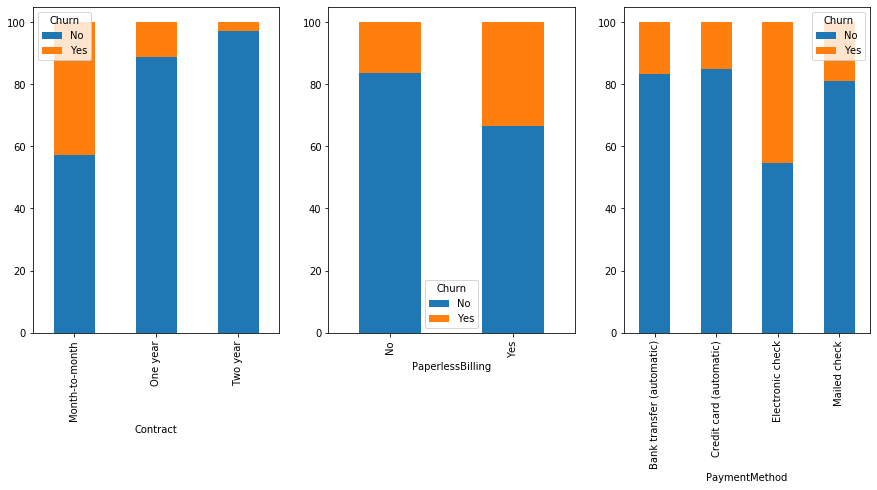

In [14]:
f, axes = plt.subplots(1, 3,figsize=(15,6))
plotcat('Contract',axes[0])
plotcat('PaperlessBilling',axes[1])
plotcat('PaymentMethod',axes[2])

Looking at the graphs above, we can see that churn rates are higher for people with month to month contracts which is pretty intuitive since these customers have a smaller chance of churning due to paid up months. 
We can also see that churn rates are higher for individuals with paperless billing and for those who pay via electronic checks.

Now, we'll take a look at how the monthly charges differ between individuals.

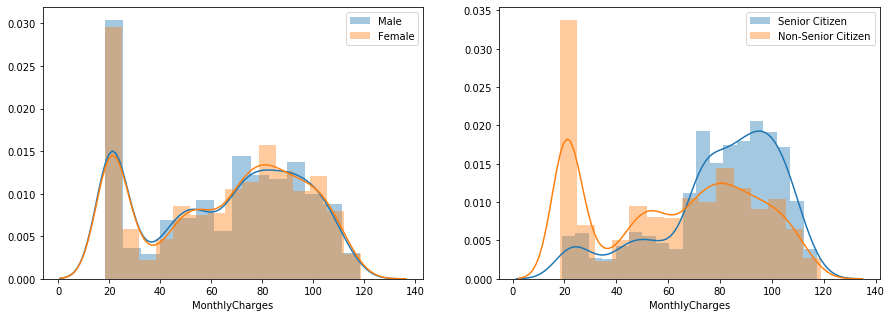

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data[data['gender']=="Male"]['MonthlyCharges'].dropna(), label='Male',ax=axes[0])
sns.distplot(data[data['gender']!="Male"]['MonthlyCharges'].dropna(), label='Female',ax=axes[0])
axes[0].legend(loc='upper right')
sns.distplot(data[data['SeniorCitizen']==1]['MonthlyCharges'].dropna(), label='Senior Citizen',ax=axes[1])
sns.distplot(data[data['SeniorCitizen']!=1]['MonthlyCharges'].dropna(), label='Non-Senior Citizen',ax=axes[1])
axes[1].legend(loc='upper right')

We can see that the distribution of monthly charges seems to be the same for both males and females. Both of them have similar spending habits. However, senior citizens are more likely to incur higher monthly charges as compared to non-senior citizens, as shown by the probability distribution in the figure on the right.

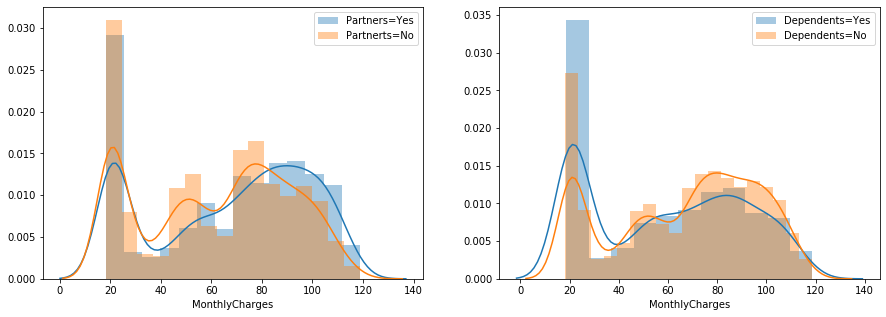

In [16]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(data[data['Partner']=="Yes"]['MonthlyCharges'], label='Partners=Yes',ax=axes[0])
sns.distplot(data[data['Partner']!="Yes"]['MonthlyCharges'], label='Partnerts=No',ax=axes[0])
axes[0].legend(loc='upper right')
sns.distplot(data[data['Dependents']=="Yes"]['MonthlyCharges'], label='Dependents=Yes',ax=axes[1])
sns.distplot(data[data['Dependents']!="Yes"]['MonthlyCharges'], label='Dependents=No',ax=axes[1])
axes[1].legend(loc='upper right')
plt.show()

Both having dependents or partners does not seem to have much impact on monthly charges for these customers.

We can now take a look at the distribution of tenure and monthly charges by looking at a scatter plot (with along with a regression line.)

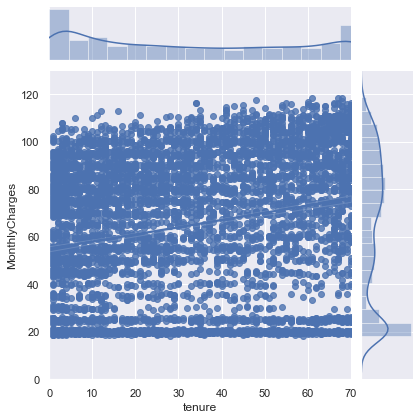

In [17]:
sns.set(style="darkgrid")
sns.jointplot(data['tenure'],data['MonthlyCharges'],kind='reg',xlim=(0, 70), ylim=(0, 130))

There does not appear to be a strong link between tenure and the monthly charges for different customers. A linear regression can solidify this statement, however it's not required for our purposes at this stage.

### DATA PREPARATION FOR MODELLING

Since most of our variables are categorical, we convert them into dummy variables so they can be utilized. We also have binary variables which use "Yes" or "No" and these should be converted into numerical values so they can be utitlized for modelling purposes.

In [18]:
data['MultipleLines'] = data['MultipleLines'].apply(lambda x: 1 if x=="Yes" else 0)
data['gender'] = data['gender'].apply(lambda x: 1 if x=="Male" else 0)
data.rename(columns={"gender":"IsMale"})
data['Partner'] = data['Partner'].apply(lambda x: 1 if x=="Yes" else 0)
data['Dependents'] = data['Dependents'].apply(lambda x: 1 if x=="Yes" else 0)
data['PhoneService'] = data['PhoneService'].apply(lambda x: 1 if x=="Yes" else 0)
data['OnlineSecurity'] = data['OnlineSecurity'].apply(lambda x: 1 if x=="Yes" else 0)
data['DeviceProtection'] = data['DeviceProtection'].apply(lambda x: 1 if x=="Yes" else 0)
data['TechSupport'] = data['TechSupport'].apply(lambda x: 1 if x=="Yes" else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].apply(lambda x: 1 if x=="Yes" else 0)
data['StreamingMovies'] = data['StreamingMovies'].apply(lambda x: 1 if x=="Yes" else 0)
data['StreamingTV'] = data['StreamingTV'].apply(lambda x: 1 if x=="Yes" else 0)
data['OnlineBackup'] = data['OnlineBackup'].apply(lambda x: 1 if x=="Yes" else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x=="Yes" else 0)

data= pd.concat(
    [data,pd.get_dummies(data['InternetService'],prefix='InternetService').iloc[:,:-1],
     pd.get_dummies(data['Contract'],prefix='Contract').iloc[:,:-1],
     pd.get_dummies(data['PaymentMethod'],prefix='PaymentMethod').iloc[:,:-1]],axis=1)
data = data.drop(['customerID','InternetService','Contract','PaymentMethod'],axis=1)

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,1,0,0,0,1
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.5,0,1,0,0,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,0,1,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,1,0,0,0,1


In [20]:
data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Our dataset is highly <b>imbalanaced.</b> This means that our accuracy measures are no longer as capable. Thus, we choose to oversampling for our minority class.

In [21]:
from sklearn.utils import resample
data_majority = data[data.Churn==0]
data_minority = data[data.Churn==1]
data_minority_upsampled = resample(data_minority, replace=True, n_samples=data_majority.shape[0],random_state=123)
data = pd.concat([data_majority, data_minority_upsampled])
data.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

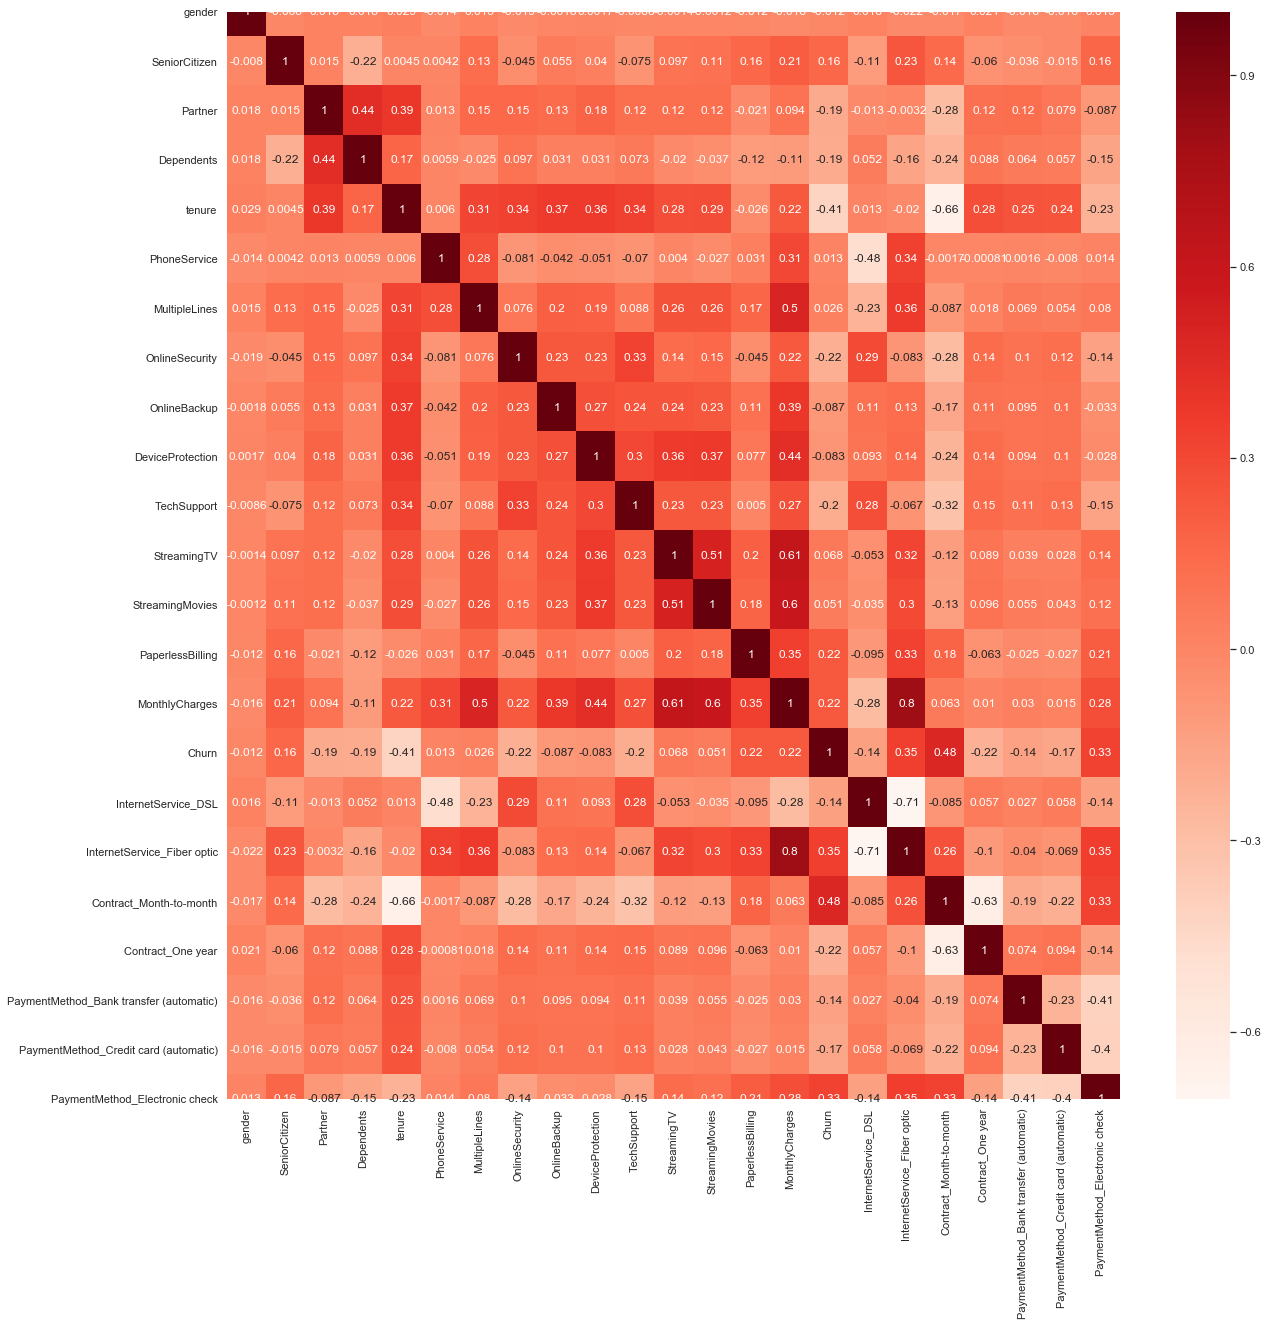

In [22]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
cor_target = abs(cor["Churn"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

tenure                            0.414914
Churn                             1.000000
InternetService_Fiber optic       0.345276
Contract_Month-to-month           0.482832
PaymentMethod_Electronic check    0.331829
Name: Churn, dtype: float64

In [24]:
X = data[relevant_features.index]
X = X.drop(["Churn"],axis=1)
y= data["Churn"]

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.7707769617317356


[[ 955  364]
 [ 229 1039]]
Specificity :  0.8194006309148265


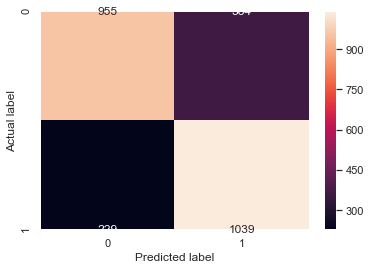

In [26]:
cm= metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt=".0f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
print(cm)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

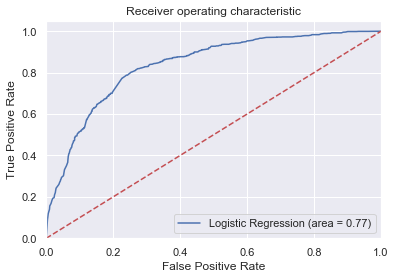

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
score = regr.score(X_test, y_test)
print(score)

0.7541553923463471


[[ 878  441]
 [ 195 1073]]
Specificity :  0.8462145110410094


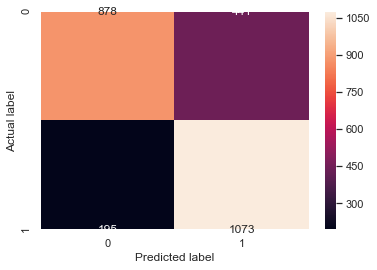

In [29]:
cm= metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt=".0f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
print(cm)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Judging by the accuracy score, we would use our first model, i.e Logisitc Regression CV to predict the customer churn. However, one measure that is important here would be specificity which measures our no churn labeled classes compared to all who are no churn in reality. We can fine-tune our logistic model to reduce specifity. (This will be at the cost of other accuracy measures; In the end it will be up to us which measure we would want to focus on.)


0.7209122535755702
[[ 724  595]
 [ 127 1141]]
Specificity :  0.8998422712933754


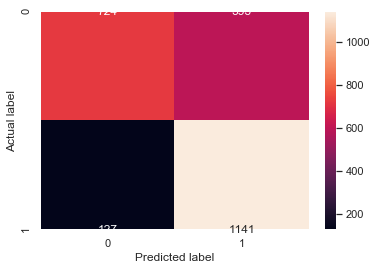

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)
predictions = np.where(clf.predict_proba(X_test)[:,1] > 0.3, 1, 0)
score = accuracy_score(y_test, predictions)
print(score)

cm= metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt=".0f");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
print(cm)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

By setting a threshold of >0.3 to be predicted as churn,we can see that we have a much lesser number of false negatives i.e people who churned but were predicted otherwise. However, this is at the cost of overall accuracy. We are now predicting a higher number of false positives as well.

We can use these models to predict whether our current customers are predicted to leave i.e churn. These customers can then be offered incentives to make sure they are retained.

Based on our models and data analysis we can draw the following conclusions and insights:
<ul><li> People with smaller tenures are more likely to leave. Thus, importance should be placed on retaining these customers by offering attractive bundles/promotions specifically catered to this group.
    <li> Customers availing fiber optic internet services are more likely to churn than those that do not avail these services. Quality of these services should be analysed further to see whether this is casuing customer dissatisfaction.
        <li> People with month to month contracts are more likely to leave. This is pretty intuitive. One way to retain these customers might be to offer incentives for longer contracts. E.g pay 5 month fee for a 6 month duration etc.
            <li> People paying via electronic checks are also churning more. The payment method should be checked to see if there's any problem with processing such payments.